<a href="https://colab.research.google.com/github/MSHDZ1/Q_late-night/blob/main/VF3_Experiment_Assigment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Setup
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

data = pd.read_csv('/content/rocketfuel_deciles.csv')
print(data.describe())
data.head ()

            user_id           test      converted       tot_impr  \
count  5.881010e+05  588101.000000  588101.000000  588101.000000   
mean   1.310692e+06       0.960000       0.025239      24.820876   
std    2.022260e+05       0.195959       0.156850      43.715181   
min    9.000000e+05       0.000000       0.000000       1.000000   
25%    1.143190e+06       1.000000       0.000000       4.000000   
50%    1.313725e+06       1.000000       0.000000      13.000000   
75%    1.484088e+06       1.000000       0.000000      27.000000   
max    1.654483e+06       1.000000       1.000000    2065.000000   

       mode_impr_day  mode_impr_hour  tot_impr_decile  
count  588101.000000   588101.000000    588101.000000  
mean        4.025533       14.469061         5.448068  
std         2.004019        4.834634         2.862418  
min         1.000000        0.000000         1.000000  
25%         2.000000       11.000000         3.000000  
50%         4.000000       14.000000         5.0000

,user_id,test,converted,tot_impr,mode_impr_day,mode_impr_hour,tot_impr_decile
0,1391842,1,0,2,3,19,2
1,1215269,1,0,1,4,12,1
2,1604030,1,0,2,6,11,2
3,1278452,1,0,1,7,18,1
4,1363432,1,0,1,6,13,1


Looking at summary statistics:


*   Test Variable, the mean shows a 96% that means that this percentage of user was exposed to the ad. This makes sense as the business case explained that a control group of 4% was desired.
*   Converted, shows a mean of 2.5%.
*   Tot_imp_decile, 10 equal size groups.






In [62]:
print(data.isnull().sum())

user_id            0
test               0
converted          0
tot_impr           0
mode_impr_day      0
mode_impr_hour     0
tot_impr_decile    0
dtype: int64


In [4]:
#Check for balance: In a table, compare the shares of individuals by treatment status,
#and the means and standard deviations of pre-experiment variables.
#Comment on your findings.

print(data.mean())

balance_table = data [['test', 'converted', 'tot_impr', 'mode_impr_day', 'mode_impr_hour', 'tot_impr_decile']].groupby('test').mean()
print(balance_table)

user_id            1.310692e+06
test               9.600001e-01
converted          2.523886e-02
tot_impr           2.482088e+01
mode_impr_day      4.025533e+00
mode_impr_hour     1.446906e+01
tot_impr_decile    5.448068e+00
dtype: float64
      converted   tot_impr  mode_impr_day  mode_impr_hour  tot_impr_decile
test                                                                      
0      0.017854  24.761138       3.952644       14.304923         5.325030
1      0.025547  24.823365       4.028570       14.475900         5.453194


We can see a slight higher convertion in the treatment group. We will further our analysis to revise if this is statistically significant.

From the mean in the pre-experiment variables we can determine that the treatment and control groups are well balanced., there are only minor differnces in mean.

In [8]:
#Plot outcome: Plot the means and confidence intervals of the main outcome “converted,”
##treatment status. In your markdown, file, interpret the result (mean and confidence intervals, noting width).

p_means = data.groupby('test')['converted'].agg(
    mean = ('mean'),
    std = ('std'),
    N = ('size')
)
p_means['se'] = p_means['std']/np.sqrt(p_means['N'])
p_means['lb'] = p_means['mean'] - 1.96*p_means['se']
p_means['ub'] = p_means['mean'] + 1.96*p_means['se']

print(p_means[['mean', 'lb', 'ub']])


          mean        lb        ub
test                              
0     0.017854  0.016162  0.019546
1     0.025547  0.025135  0.025958


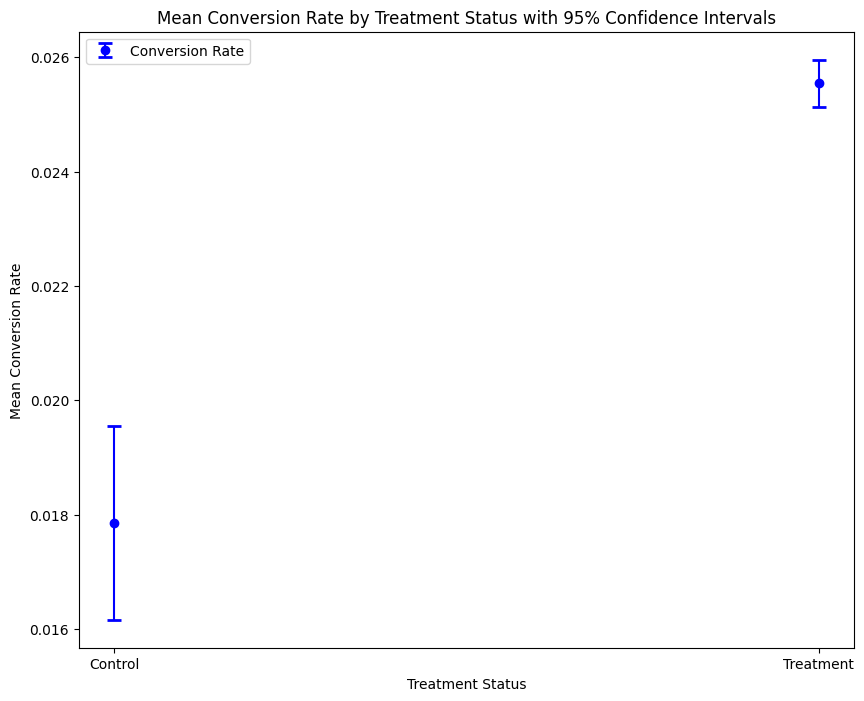

In [10]:
#Plot

plt.figure(figsize=(10, 8))
plt.errorbar(
    x=p_means.index,
    y=p_means['mean'],
    yerr=[p_means['mean'] - p_means['lb'], p_means['ub'] - p_means['mean']],
    fmt='o',
    capsize=5,
    capthick=2,
    color='blue',
    label='Conversion Rate'
)

# Add labels and title
plt.xticks([0, 1], ['Control', 'Treatment'])
plt.xlabel('Treatment Status')
plt.ylabel('Mean Conversion Rate')
plt.title('Mean Conversion Rate by Treatment Status with 95% Confidence Intervals')
plt.legend()

The control group has a mean conversion rate of 0.017854 and confidence intervals [0.016162, 0.019546]

Then treatment grup has a mean 0.025547 conversion rate and confidence intervals [0.025135  0.025958]

The conficence interval between the two groups are not overlapping, this indicates that the conversion rate between the two groups might be statistically significant and not due to randomization. The treatment group shows a higher mean that the control, also it shows narrower confidence intervals. This might be due to the fact that the sample size is quite large for the treatment group, not so for the control group.



In [19]:
#Find ATE: Estimate of the Average Treatment Effect (ATE)
#of the ads for treatment relative to control, the associated standard error,
#and the 95% confidence interval on the Average Treatment Effects.
#You can do this by hand or with regression (but be careful about standard errors).

p_ate = p_means['mean']- p_means['mean'][0]
p_ate = p_ate.to_frame(name='ate')
print(p_ate)

p_ate['se'] = np.sqrt( p_means['se']**2 + p_means['se'][0]**2 )
p_ate['lb'] = p_ate['ate'] - 1.96*p_ate['se']
p_ate['ub'] = p_ate['ate'] + 1.96*p_ate['se']

print(p_ate[['se','ate', 'lb', 'ub']])

           ate
test          
0     0.000000
1     0.007692
            se       ate        lb        ub
test                                        
0     0.001221  0.000000 -0.002393  0.002393
1     0.000889  0.007692  0.005951  0.009434


In [17]:
#use regression
formula = 'converted ~ C(test)'
model = smf.ols(formula, data= data ).fit()
model = model.get_robustcov_results(cov_type='HC3')
print(model.summary() )

                            OLS Regression Results                            
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     74.94
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           4.86e-18
Time:                        21:57:18   Log-Likelihood:             2.5499e+05
No. Observations:              588101   AIC:                        -5.100e+05
Df Residuals:                  588099   BIC:                        -5.099e+05
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0179      0.001     20.678   

In [29]:
#Subgroup analysis: Create a summary table showing the treatment effect in each decile.
#Your table should indicate the decile,
##control mean, HTE, lift, and 95% CI for the HTE.

## Alternative way of making our HTE table
alt_table = data.groupby(['tot_impr_decile', 'converted'])['test'].agg(
    mean = 'mean', sem = 'sem' )

## Alt table stacks up the subgroup-specific ATE tables
print(alt_table)

# We can also unstack them, so tat each subgroup is a row
# There are separate columns for each treatment arm mean and SEM
alt_table  = alt_table.unstack()
print(alt_table)

# We can grab a particular treatment arm's variable using integer indexes:
# for example, here is the control mean
print('\n\n Control group mean in each type:')
print(alt_table['mean'][0])

                               mean       sem
tot_impr_decile converted                    
1               0          0.959216  0.000832
                1          0.966292  0.019239
2               0          0.952542  0.000813
                1          0.960000  0.014856
3               0          0.956379  0.000891
                1          0.935135  0.018157
4               0          0.957523  0.000835
                1          0.944000  0.014571
5               0          0.964355  0.000740
                1          0.965197  0.008839
6               0          0.970164  0.000709
                1          0.969095  0.008140
7               0          0.958789  0.000788
                1          0.955847  0.007101
8               0          0.961841  0.000875
                1          0.966697  0.005386
9               0          0.961724  0.000808
                1          0.974951  0.002819
10              0          0.954866  0.000936
                1          0.97523

In [34]:
# Q4 alternative, continued.
# Continuing with alternate approach
# So we can make ATE, lift, and CI, but note we do it separate for each treatment arm

alt_table['ate1']= alt_table['mean'][1] - alt_table['mean'][0]
alt_table['lift1']= alt_table['ate1'] / alt_table['mean'][0]
alt_table['se_ate1'] = np.sqrt(alt_table['sem'][1]**2 + alt_table['sem'][0]**2)
alt_table['lb1'] = alt_table['ate1'] - 1.96*alt_table['se_ate1']
alt_table['ub1'] = alt_table['ate1'] + 1.96*alt_table['se_ate1']

# print control mean, ate1, 95%, lift
alt_table['cmean'] = alt_table['mean'][0]
cols_to_show = ['cmean', 'ate1', 'lb1', 'ub1', 'lift1']
print(alt_table[cols_to_show])

                    cmean      ate1       lb1       ub1     lift1
converted                                                        
tot_impr_decile                                                  
1                0.959216  0.007076 -0.030667  0.044820  0.007377
2                0.952542  0.007458 -0.021703  0.036619  0.007830
3                0.956379 -0.021244 -0.056874  0.014385 -0.022213
4                0.957523 -0.013523 -0.042129  0.015082 -0.014123
5                0.964355  0.000843 -0.016542  0.018227  0.000874
6                0.970164 -0.001069 -0.017084  0.014946 -0.001102
7                0.958789 -0.002942 -0.016945  0.011061 -0.003068
8                0.961841  0.004856 -0.005838  0.015550  0.005049
9                0.961724  0.013227  0.007479  0.018975  0.013754
10               0.954866  0.020368  0.016543  0.024193  0.021330


In [35]:
# Rename columns for clarity
alt_table = alt_table.rename(columns={
    'cmean': 'Control Mean',
    'ate1': 'HTE',
    'lb1': 'CI_Lower',
    'ub1': 'CI_Upper',
    'lift1': 'Lift'
})

# Print the renamed table to verify
print(alt_table[['Control Mean', 'HTE', 'CI_Lower', 'CI_Upper', 'Lift']])

                Control Mean       HTE  CI_Lower  CI_Upper      Lift
converted                                                           
tot_impr_decile                                                     
1                   0.959216  0.007076 -0.030667  0.044820  0.007377
2                   0.952542  0.007458 -0.021703  0.036619  0.007830
3                   0.956379 -0.021244 -0.056874  0.014385 -0.022213
4                   0.957523 -0.013523 -0.042129  0.015082 -0.014123
5                   0.964355  0.000843 -0.016542  0.018227  0.000874
6                   0.970164 -0.001069 -0.017084  0.014946 -0.001102
7                   0.958789 -0.002942 -0.016945  0.011061 -0.003068
8                   0.961841  0.004856 -0.005838  0.015550  0.005049
9                   0.961724  0.013227  0.007479  0.018975  0.013754
10                  0.954866  0.020368  0.016543  0.024193  0.021330


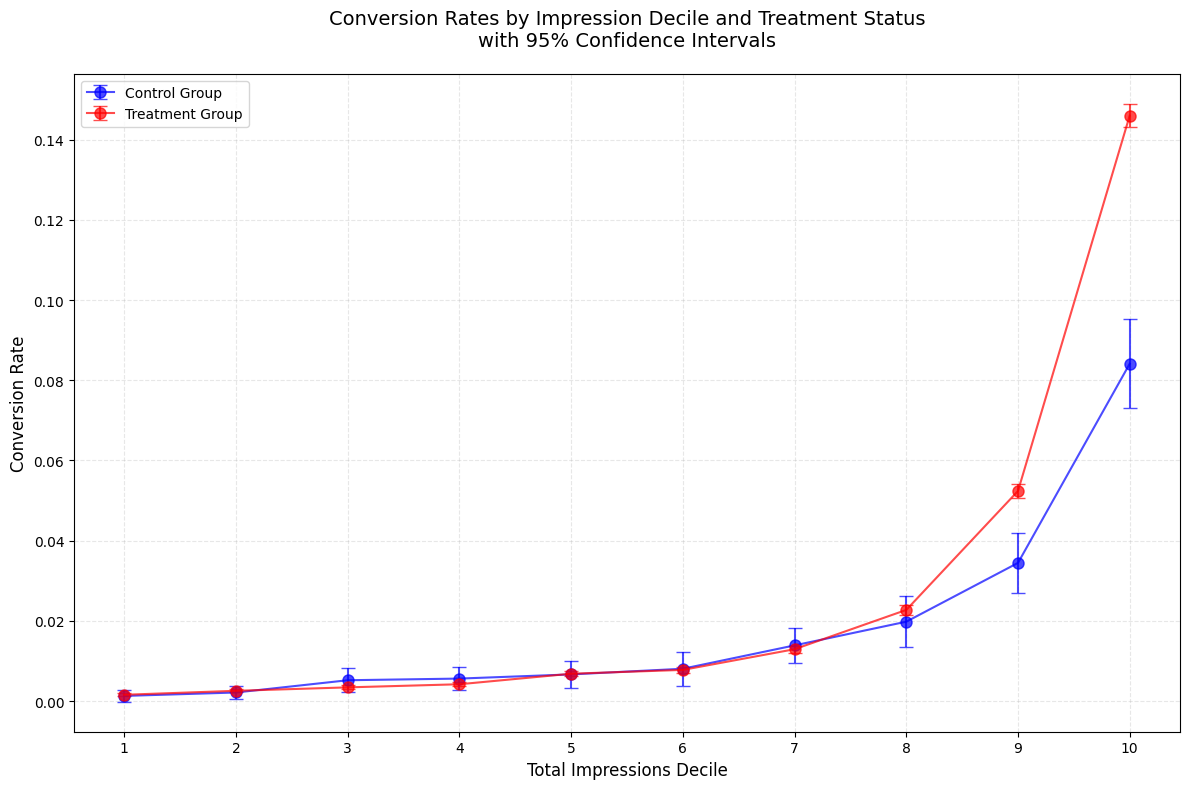


Summary Statistics:
    tot_impr_decile  test    mean  count     std      se  ci_lower  ci_upper
0                 1     0  0.0013   2308  0.0360  0.0008   -0.0002    0.0028
1                 1     1  0.0016  54298  0.0398  0.0002    0.0012    0.0019
2                 2     0  0.0022   3249  0.0464  0.0008    0.0006    0.0037
3                 2     1  0.0026  65239  0.0507  0.0002    0.0022    0.0030
4                 3     0  0.0052   2304  0.0720  0.0015    0.0023    0.0081
5                 3     1  0.0034  50425  0.0585  0.0003    0.0029    0.0039
6                 4     0  0.0056   2490  0.0748  0.0015    0.0027    0.0086
7                 4     1  0.0042  56051  0.0648  0.0003    0.0037    0.0047
8                 5     0  0.0067   2250  0.0814  0.0017    0.0033    0.0100
9                 5     1  0.0068  60882  0.0824  0.0003    0.0062    0.0075
10                6     0  0.0081   1734  0.0895  0.0021    0.0039    0.0123
11                6     1  0.0078  56368  0.0879  0.000

In [63]:
#Question 5

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate means and confidence intervals for each subgroup
def calc_ci(data, groupby_cols, metric_col):
    stats = data.groupby(groupby_cols)[metric_col].agg([
        'mean',
        'count',
        'std'
    ]).reset_index()

    # Calculate standard error and confidence intervals
    stats['se'] = stats['std'] / np.sqrt(stats['count'])
    stats['ci_lower'] = stats['mean'] - 1.96 * stats['se']
    stats['ci_upper'] = stats['mean'] + 1.96 * stats['se']

    return stats

# Calculate statistics for both groups
subgroup_stats = calc_ci(data, ['tot_impr_decile', 'test'], 'converted')

# Create the plot
plt.figure(figsize=(12, 8))

# Plot for control group (test=0)
control_data = subgroup_stats[subgroup_stats['test'] == 0]
treatment_data = subgroup_stats[subgroup_stats['test'] == 1]

# Plot control group
plt.errorbar(control_data['tot_impr_decile'], control_data['mean'],
             yerr=[control_data['mean'] - control_data['ci_lower'],
                   control_data['ci_upper'] - control_data['mean']],
             fmt='o-', color='blue', label='Control Group',
             capsize=5, capthick=1, markersize=8, alpha=0.7)

# Plot treatment group
plt.errorbar(treatment_data['tot_impr_decile'], treatment_data['mean'],
             yerr=[treatment_data['mean'] - treatment_data['ci_lower'],
                   treatment_data['ci_upper'] - treatment_data['mean']],
             fmt='o-', color='red', label='Treatment Group',
             capsize=5, capthick=1, markersize=8, alpha=0.7)

# Customize the plot
plt.xlabel('Total Impressions Decile', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.title('Conversion Rates by Impression Decile and Treatment Status\nwith 95% Confidence Intervals',
          fontsize=14, pad=20)

# Set x-axis ticks to match deciles
plt.xticks(range(1, 11))

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.3)

# Add legend
plt.legend(fontsize=10)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print summary statistics for verification
print("\nSummary Statistics:")
print(subgroup_stats.round(4))

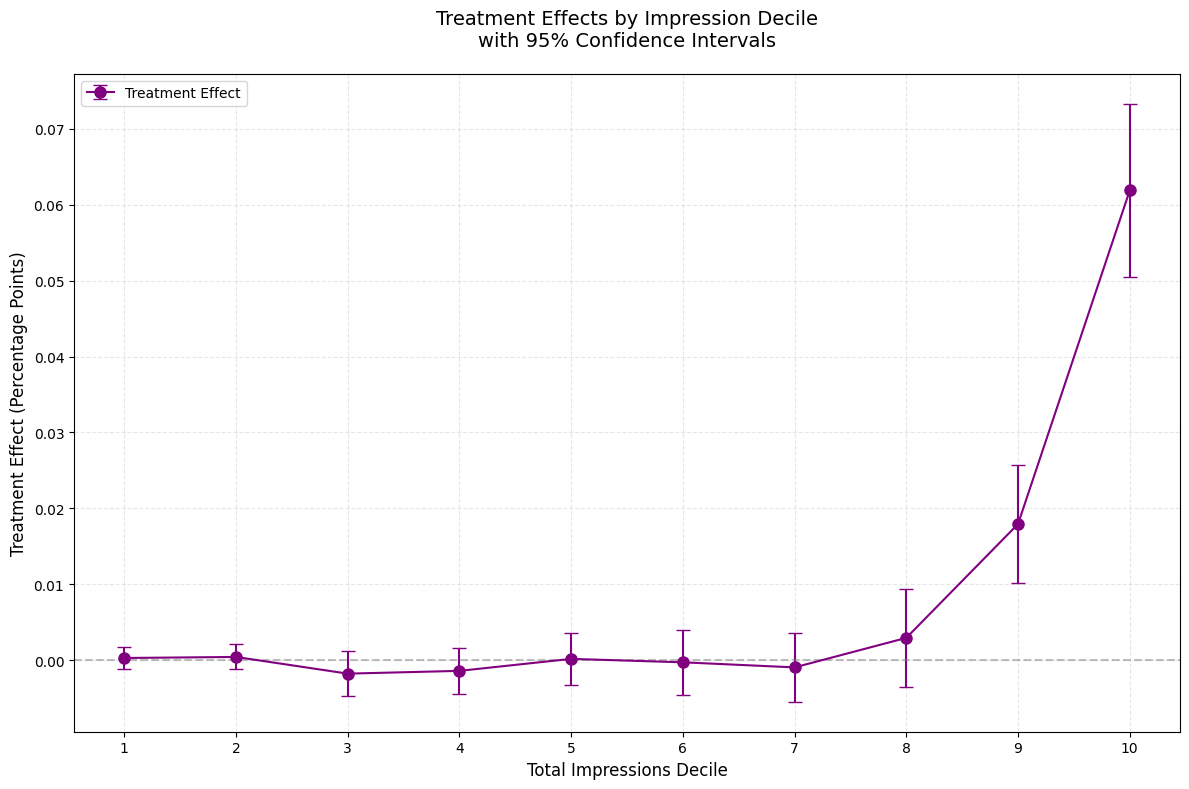


Treatment Effects by Decile:
   decile  effect      se  ci_lower  ci_upper
0       1  0.0003  0.0008   -0.0012    0.0018
1       2  0.0004  0.0008   -0.0012    0.0021
2       3 -0.0018  0.0015   -0.0048    0.0012
3       4 -0.0014  0.0015   -0.0044    0.0016
4       5  0.0002  0.0017   -0.0033    0.0036
5       6 -0.0003  0.0022   -0.0046    0.0040
6       7 -0.0010  0.0023   -0.0055    0.0036
7       8  0.0029  0.0033   -0.0035    0.0094
8       9  0.0179  0.0040    0.0101    0.0257
9      10  0.0619  0.0058    0.0504    0.0733


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate treatment effects and CIs by decile
def calc_treatment_effects(data):
    effects = []

    for decile in range(1, 11):
        # Get data for this decile
        decile_data = data[data['tot_impr_decile'] == decile]

        # Calculate means for treatment and control
        treatment_mean = decile_data[decile_data['test'] == 1]['converted'].mean()
        control_mean = decile_data[decile_data['test'] == 0]['converted'].mean()

        # Calculate standard errors
        treatment_se = decile_data[decile_data['test'] == 1]['converted'].std() / \
                      np.sqrt(len(decile_data[decile_data['test'] == 1]))
        control_se = decile_data[decile_data['test'] == 0]['converted'].std() / \
                    np.sqrt(len(decile_data[decile_data['test'] == 0]))

        # Calculate treatment effect and combined standard error
        effect = treatment_mean - control_mean
        combined_se = np.sqrt(treatment_se**2 + control_se**2)

        effects.append({
            'decile': decile,
            'effect': effect,
            'se': combined_se,
            'ci_lower': effect - 1.96 * combined_se,
            'ci_upper': effect + 1.96 * combined_se
        })

    return pd.DataFrame(effects)

# Calculate treatment effects
effects_df = calc_treatment_effects(data)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot treatment effects
plt.errorbar(effects_df['decile'], effects_df['effect'],
             yerr=[effects_df['effect'] - effects_df['ci_lower'],
                   effects_df['ci_upper'] - effects_df['effect']],
             fmt='o-', color='purple', capsize=5, capthick=1,
             markersize=8, label='Treatment Effect')

# Add horizontal line at y=0 to show baseline
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)

# Customize the plot
plt.xlabel('Total Impressions Decile', fontsize=12)
plt.ylabel('Treatment Effect (Percentage Points)', fontsize=12)
plt.title('Treatment Effects by Impression Decile\nwith 95% Confidence Intervals',
          fontsize=14, pad=20)

# Set x-axis ticks to match deciles
plt.xticks(range(1, 11))

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.3)

# Add legend
plt.legend(fontsize=10)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print the effects table for verification
print("\nTreatment Effects by Decile:")
print(effects_df.round(4))

In [65]:
#6 # Set the constants
markup_per_sale = 40  # $40 markup per conversion (sale)
CPM = 9  # Cost per thousand impressions in dollars

# Calculate ATE on conversions as the average of HTE (treatment effect) across deciles
ate_on_conversions = control_table['HTE'].mean()

# Calculate average ad spending per person in treatment group
average_impressions_treatment = data[data['test'] == 1]['tot_impr'].mean()
ad_spending_per_person = (CPM / 1000) * average_impressions_treatment

# Calculate the return on advertising spending
return_on_ad_spend = (ate_on_conversions * markup_per_sale) / ad_spending_per_person
print("Return on Advertising Spending:", return_on_ad_spend)


Return on Advertising Spending: 0.7088750351005751


In [67]:
# Set constants
markup_per_sale = 40  # $40 markup per conversion (sale)
CPM = 9  # Cost per thousand impressions in dollars

# Initialize list to store return by decile
returns_by_decile = []

for decile in control_table['tot_impr_decile'].unique():
    decile_data = control_table[(control_table['tot_impr_decile'] == decile) & (control_table['test'] == 1)]

    # Extract ATE for the decile
    ate_decile = decile_data['HTE'].values[0]
    print(f"Decile {decile} - ATE: {ate_decile}")  # Debugging line

    # Calculate average impressions for treatment group in the decile
    avg_impressions = data[(data['tot_impr_decile'] == decile) & (data['test'] == 1)]['tot_impr'].mean()
    ad_spending_decile = (CPM / 1000) * avg_impressions
    print(f"Decile {decile} - Ad Spending per Person: {ad_spending_decile}")  # Debugging line

    # Calculate return for the decile
    if ad_spending_decile > 0:  # Avoid division by zero
        return_decile = (ate_decile * markup_per_sale) / ad_spending_decile
    else:
        return_decile = 0  # Set to zero if ad spending is zero (unlikely if impressions exist)
    returns_by_decile.append((decile, return_decile))

# Convert to DataFrame for easier viewing
returns_df = pd.DataFrame(returns_by_decile, columns=['Decile', 'Return'])
print("\nReturns by Decile:")
print(returns_df)

# Filter for positive returns
positive_returns = returns_df[returns_df['Return'] > 0]
print("\nDeciles with Positive Returns:")
print(positive_returns)


Decile 1 - ATE: 0.0002840253858081977
Decile 1 - Ad Spending per Person: 0.009
Decile 2 - ATE: 0.00042063768832068795
Decile 2 - Ad Spending per Person: 0.021770014868406934
Decile 3 - ATE: -0.001777495455296645
Decile 3 - Ad Spending per Person: 0.041001804660386706
Decile 4 - ATE: -0.0014120387636073544
Decile 4 - Ad Spending per Person: 0.06187650532550712
Decile 5 - ATE: 0.00016622318583489355
Decile 5 - Ad Spending per Person: 0.09941199369271705
Decile 6 - ATE: -0.0002857110351779579
Decile 6 - Ad Spending per Person: 0.13990427192733465
Decile 7 - ATE: -0.0009534508187641049
Decile 7 - Ad Spending per Person: 0.18750322434664551
Decile 8 - ATE: 0.002934429561040078
Decile 8 - Ad Spending per Person: 0.25727982467284966
Decile 9 - ATE: 0.017933278274583464
Decile 9 - Ad Spending per Person: 0.39041390705318735
Decile 10 - ATE: 0.06187508911780076
Decile 10 - Ad Spending per Person: 1.0662851456716527

Returns by Decile:
   Decile    Return
0       1  1.262335
1       2  0.772875
